<a href="https://colab.research.google.com/github/antoniperuzynski/BenfordsLaw/blob/main/Benford_Law.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prawo Benforda
## Antoni Perużyński

## Imports

In [1]:
#pip install sigfig

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
def toInterval10To100(x): 
  while (x<10 or x>=100):
    if x < 10:
      x *=10
    elif x >= 100:
      x/=10
  return x

In [3]:
from scipy.stats import variation 

def stats (data):
  print("Mean", data.mean())
  print("Varation", data.var())
  print("Std", data.std())
  print("Median", data.median())
  print("Mode", data.mode())
  print("Skew", data.skew())
  print("Kurtosis", data.kurtosis())
  print("Variation", variation(data))

## Testy statystyczne

### Test zgodności Chi^2

In [4]:
def chi2 (theoryDist, expDist):
    chiSquareStat = 0
    for i in range(len(theoryDist)):
        chiSquareStat += (expDist[i]-theoryDist[i])**2/theoryDist[i]
    #print("\nChi-squared Test Statistic = {:.3f}".format(chiSquareStat))   
    return chiSquareStat

### Test dla wskaźnika struktury

In [5]:
def structureIndicator(theoryDist, expDist, n):
    strIndStat = 0
    for i,j in zip(theoryDist, expDist):
        strIndStat += (np.absolute(j-i)-1/(2*n))/(i*(1-i))**(1/2)
    strIndStat = strIndStat*(1/len(theoryDist))*(n**(1/2))
    return strIndStat

### Test Kołmogorowa-Smirnowa

In [96]:
def KolmogorowSmirnow(theoryDist, expDist, n):
    KSStat = math.sqrt(n)
    tD = np.cumsum(theoryDist)
    eD = np.cumsum(expDist)
    D=max(np.absolute(np.array(tD)-np.array(eD)))
    KSStat *= D
    return KSStat

### Test KS1

In [97]:
def KS1(theoryDist, expDist, n):
    KSStat = math.sqrt(n**2/(2*n))
    tD = np.cumsum(theoryDist)
    eD = np.cumsum(expDist)
    D=max(np.absolute(np.array(tD)-np.array(eD)))
    KSStat *= D
    return KSStat

### Test KS3

In [98]:
def KS3(theoryDist, expDist, n):
    N = n**2/(2*n)
    KSStat = (math.sqrt(N)+0.155+0.24*(N)**(-1/2))
    tD = np.cumsum(theoryDist)
    eD = np.cumsum(expDist)
    DNPlus = max(np.array(eD) - np.array(tD))
    DNMinus = max(np.array(tD) - np.array(eD))
    Vn = DNPlus + DNMinus
    KSStat *= Vn
    return KSStat

### Test Podobieństwa

In [10]:
def Measure_Similaristy_1(data_percentage, benford_list_probability):
    probability_measure_similaristy_list_1 =[]
    M1 = 0
    sum = 0
    
    for i in range(len(benford_list_probability)):
        probability_measure_similaristy_list_1.append(benford_list_probability[i]*100)
    
    for i in range(len(benford_list_probability)):
        sum += math.fabs((data_percentage[i]-probability_measure_similaristy_list_1[i])/probability_measure_similaristy_list_1[i])
        
    
    M1 = (100/len(data_percentage))*sum
    
    
    return M1

In [11]:
def Measure_Similaristy_2(data_percentage, benford_list_probability):
    probability_measure_similaristy_list_2 =[]
    M2 = 0
    sum = 0
    
    for i in range(len(benford_list_probability)):
        probability_measure_similaristy_list_2.append(benford_list_probability[i]*100)
    
    for i in range(len(benford_list_probability)):
        sum += math.pow((data_percentage[i]-probability_measure_similaristy_list_2[i]),2)
        
    
    M2 = (math.sqrt(sum)/len(data_percentage))
    
    
    return M2

In [12]:
def Measure_Similaristy_3(data_percentage, benford_list_probability):
    probability_measure_similaristy_list_3 =[]
    M3 = 0
    sum = 0
    
    for i in range(len(benford_list_probability)):
        probability_measure_similaristy_list_3.append(benford_list_probability[i]*100)
    
    for i in range(len(benford_list_probability)):
        sum += math.pow((data_percentage[i]-probability_measure_similaristy_list_3[i]),2)
        
    
    M3 = (math.sqrt(sum/len(data_percentage)))
    
    
    return M3

### Test Odległości 

In [13]:
def distanceTest(theoryDist, expDist):
    return max(np.absolute(np.array(theoryDist)-np.array(expDist)))

## Load data

In [14]:
def load_data(filename):
        df=pd.read_excel(filename)
        return df

## Benford digits

In [15]:
def count_first_digit(data):
    # Get only non-zero values
    data = data[data>=1]

    # Get the first digits
    first_digits = list(map(lambda x: int(str(x)[0]), data))
    
    
    # Count occurences. Make sure every position is for [1-9]
    empirical_counts = np.zeros(9)
    digit = []
    for i in range(1, 10):
        empirical_counts[i - 1] = first_digits.count(i)
        digit.append(i)

    # Total amount
    total_count = sum(empirical_counts)
    # Make percentage
    empirical_frequency = [(i / total_count) for i in empirical_counts]
    # Return
    return(empirical_counts, empirical_frequency, total_count, digit)

In [16]:
def count_second_digit(data):
    # Get only non-zero values
    data = data[data>=0]

    # Get the first digits
    dataMore10 = data[data>=10]
    second_digits = list(map(lambda x: int(str(x)[1]), dataMore10))
    for i in data[data<10]:
        second_digits.append(0)
    
    
    # Count occurences. Make sure every position is for [1-9]
    empirical_counts = np.zeros(10)
    digit = []
    for i in range(0, 10):
        empirical_counts[i] = second_digits.count(i)
        digit.append(i)

    # Total amount
    total_count = sum(empirical_counts)
    # Make percentage
    empirical_frequency = [(i / total_count) for i in empirical_counts]
    # Return
    return(empirical_counts, empirical_frequency, total_count, digit)

In [17]:
def count_two_first_digit(data):
    # Get only non-zero values
    data = data[data>=0]

    # Get the first digits
    dataMore10 = data[data>=10]
    second_digits = list(map(lambda x: int(str(x)[:2]), dataMore10))

    # Count occurences. Make sure every position is for [1-9]
    empirical_counts = np.zeros(90)
    digit = []
    for i in range(10, 100):
        empirical_counts[i-10] = second_digits.count(i)
        digit.append(i)

    # Total amount
    total_count = sum(empirical_counts)
    # Make percentage
    empirical_frequency = [(i / total_count) for i in empirical_counts]
    # Return
    return(empirical_counts, empirical_frequency, total_count, digit)

In [18]:
def count_last_digit(data):
    # Get only non-zero values
    data = data[data>=0]

    # Get the first digits
    last_digits = list(map(lambda x: int(str(x)[-1]), data))
    
    # Count occurences. Make sure every position is for [1-9]
    empirical_counts = np.zeros(10)
    digit = []
    for i in range(0, 10):
        empirical_counts[i] = last_digits.count(i)
        digit.append(i)

    # Total amount
    total_count = sum(empirical_counts)
    # Make percentage
    empirical_frequency = [(i / total_count) for i in empirical_counts]
    # Return
    return(empirical_counts, empirical_frequency, total_count, digit)

## Theoretical Benford Distributions

In [19]:
def theoretical_1st_number_counts():
    benford_first=[]
    for i in range(1,10):
        benford_first.append(math.log10(1+1/i))
    return benford_first

In [20]:
def theoretical_2nd_number_counts():
    benford_second=[]
    for i in range(0,10):
        suma=0
        for j in range (1,10):
            suma = suma + math.log10(1+(1/(10*j+i)))
        benford_second.append(suma)
    return benford_second

In [21]:
def theoretical_two_1st_number_counts():
    return [round(math.log(1+(i)**(-1), 10), 6)for i in range(10,100)]

## Program

In [128]:
def newCasesForCountry(dfAll, country):
  dfCountry=dfAll[["date",country]]
  dfCountry = dfCountry.dropna()
  dfCountry.reset_index(drop=True, inplace=True)
  dfCountry.iloc[:,1] = dfCountry.iloc[:,1].astype(int)
  dfCountry.rename(columns =  {country: "new_cases"}, inplace = True)
  return dfCountry

In [129]:
dfAll = pd.read_csv("new_cases.csv")
# df=dfAll[["date","Poland"]]
# df = df.dropna()
# df.reset_index(drop=True, inplace=True)
# df.iloc[:,1] = df.iloc[:,1].astype(int)
# df.head()

In [130]:
df = newCasesForCountry(dfAll, "Poland")

In [131]:
#df=load_data('Poland_COVID.xlsx')
# df=df.dropna()
# df.dropna(inplace=True)
# df.reset_index(drop=True, inplace=True)
# df['new_cases']=df['new_cases'].astype(int)

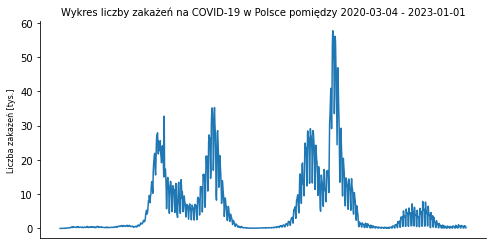

In [132]:
plt.figure(figsize=(8, 4))
plt.ylabel("Liczba zakażeń [tys.]", fontsize = 8)
#plt.xticks(rotation = 45)
plt.title(f"Wykres liczby zakażeń na COVID-19 w Polsce pomiędzy {df.date.iloc[0]} - {df.date.iloc[-1]}", fontsize = 10)
plt.plot(df.date, df.new_cases/1000)
#plt.xlim([datetime.date(2020,3,4),datetime.date(2020, 10, 10)])
ax = plt.gca()
ax.set_xticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False);

In [133]:
empirical_counts, empirical_frequency, total_count, digit = count_first_digit(df['new_cases'])
empirical_counts2, empirical_frequency2, total_count2, digit2 = count_second_digit(df['new_cases'])
empirical_two_first_counts, empirical_two_first_frequency2, total_two_first_count2, digit_two_first = count_two_first_digit(df['new_cases'])

In [134]:
theoretical_1st_number = theoretical_1st_number_counts()
theoretical_2nd_number = theoretical_2nd_number_counts()
theoretical_two_1st_number = theoretical_two_1st_number_counts()

## Visualization

In [167]:
def first_digit_chart(empirical_frequency, theoretical_frequency, title):
   
    x = [i for i in range(1,10)]
    x = np.array(x)
    y1 = np.array(empirical_frequency)
    y2 = np.array(theoretical_frequency)
    
        
    plt.figure(figsize=(10, 5))
    plt.xticks(x)

    
    plt.ylabel("Prawdopodobieństwo")
    plt.xlabel("Pierwsza cyfra znacząca")
    plt.title(title)
    #plt.scatter(x, y2, s=150, c='red', zorder=2, marker = 11)
    plt.plot(x, y2, zorder = 2, c='red')
    plt.bar(x, y1)
    
    
    plt.show()
    return plt

In [136]:
def second_digit_chart(empirical_frequency, theoretical_frequency):
   
    x = [i for i in range(0,10)]
    x = np.array(x)
    y1 = np.array(empirical_frequency)
    y2 = np.array(theoretical_frequency)
    
        
    plt.figure(figsize=(10, 5))
    plt.xticks(x)

    
    plt.ylabel("Prawdopodobieństwo")
    plt.xlabel("Druga cyfra znacząca")
    #plt.scatter(x, y2, s=150, c='red', zorder=2, marker = 11)
    plt.plot(x, y2, zorder = 2, c='red')
    plt.bar(x, y1)
    
    
    plt.show()

In [137]:
def two_first_digit_chart(empirical_frequency, theoretical_frequency):
   
    x = [i for i in range(10,100)]
    x = np.array(x)
    y1 = np.array(empirical_frequency)
    y2 = np.array(theoretical_frequency)
    
        
    plt.figure(figsize=(20, 5))
    plt.xticks(np.arange(10, 100, 10.0))
    
    plt.ylabel("Prawdopodobieństwo")
    plt.xlabel("Druga cyfra znacząca")
    #plt.scatter(x, y2, s=150, c='red', zorder=2, marker = 11)
    plt.plot(x, y2, zorder = 2, c='red')
    plt.bar(x, y1)
    
    
    plt.show()

## First digit d1

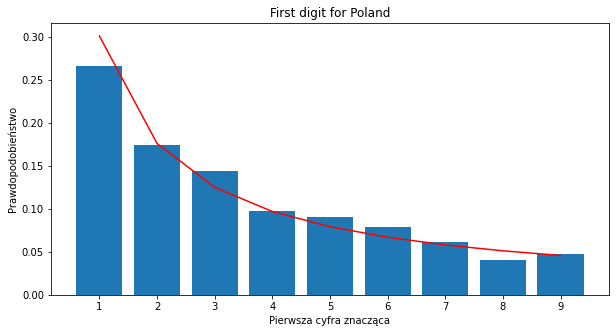

In [139]:
first_digit_chart(empirical_frequency, theoretical_1st_number, "First digit for Poland")

In [92]:
# First wat of chi2
# x = sum([(o-e)**2./e for o,e in zip(empirical_frequency,theoretical_1st_number)])
# x*total_count


# x= np.array(theoretical_1st_number)*total_count
# chi2(x, empirical_counts)

# Third way of chi2
# from scipy.stats import chisquare
# chisquare(empirical_counts, f_exp=x)

In [94]:
#chi2(np.array(theoretical_1st_number)* total_count,np.array(empirical_frequency)* total_count)

13.282419495710185

In [146]:
# Forth way of chi2
chi2(theoretical_1st_number,empirical_frequency) * total_count

13.282419495710196

Statystyka testowa: $ \frac{\chi^2}{n} $

In [147]:
chi2(theoretical_1st_number,empirical_frequency) 

0.012870561526850965

In [148]:
KolmogorowSmirnow(theoretical_1st_number,empirical_frequency, total_count)

1.1638729311997194

In [149]:
KS1(theoretical_1st_number,empirical_frequency, total_count)

0.8229824420907857

In [150]:
KS3(theoretical_1st_number,empirical_frequency, total_count)

1.0287730261206782

In [151]:
structureIndicator(theoretical_1st_number,empirical_frequency, total_count) # Srednia dla

0.9932002651051005

In [100]:
distanceTest(theoretical_1st_number, empirical_frequency)

0.03455712744692696

## Second digit d2

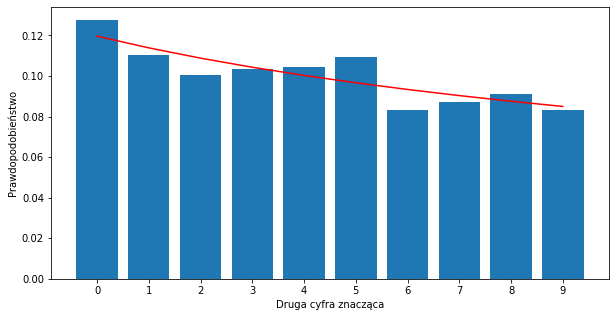

In [101]:
second_digit_chart(empirical_frequency2, theoretical_2nd_number)

## Two firsts digits d1d2

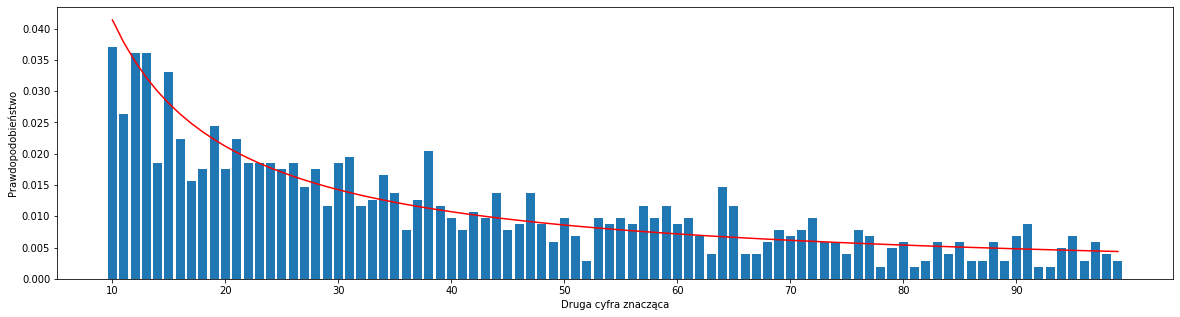

In [102]:
two_first_digit_chart(empirical_two_first_frequency2, theoretical_two_1st_number)

In [103]:

# a=list(map(lambda x: int(str(x)[0]), data))

# sum_list = np.zeros(9)
# for i in range(len(data)):
#     for j in range(1,10):
#         if a[i]==j:
#             sum_list[j-1] += data.loc[i]
# sum_list

In [104]:
# data = df['new_cases']
# #data=data[data>0]

# a=list(map(lambda x: int(str(x)[:2]), data))


# for i in range(len(a)):
#     if a[i]<10:
#         a[i] *= 10

# #print(a)
# #print(data)
# sum_list = np.zeros(90)
# for i in range(len(data)):
#     for j in range(10,100):
#         if a[i]==j:
#             sum_list[j-10] += data.loc[i]
#             print("i wynosi:", i, "j wynosi:", j, "dodawany element to:", data.loc[i], "a suma:", sum_list[j-10])
# #print(sum_list)
# plt.plot(sum_list)

In [105]:
# def count_second_digit(data):
#     # Get only non-zero values
#     data = data[data>=0]

#     # Get the first digits
#     dataMore10 = data[data>=10]
#     second_digits = list(map(lambda x: int(str(x)[1]), dataMore10))
#     for i in data[data<10]:
#         second_digits.append(0)
    
    
#     # Count occurences. Make sure every position is for [1-9]
#     empirical_counts = np.zeros(10)
#     digit = []
#     for i in range(0, 10):
#         empirical_counts[i] = second_digits.count(i)
#         digit.append(i)

#     # Total amount
#     total_count = sum(empirical_counts)
#     # Make percentage
#     empirical_frequency = [(i / total_count) for i in empirical_counts]
#     # Return
#     return(empirical_counts, empirical_frequency, total_count, digit)

## The first digit in each wave of disease

In [106]:
df_1_wave = df[( ((df["date"]<= '2020-09-20')))]

In [107]:
df_1_wave.head(2)

,date,new_cases
0,2020-03-04,1
1,2020-03-05,0


In [108]:
df_1_wave.describe()

,new_cases
count,201.000000
mean,394.228856
std,210.205155
min,0.000000
25%,272.000000
50%,362.000000
75%,545.000000
max,1002.000000


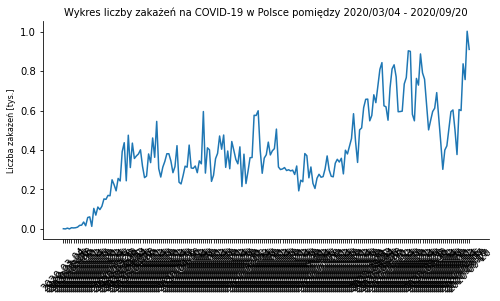

In [109]:
plt.figure(figsize=(8, 4))
plt.ylabel("Liczba zakażeń [tys.]", fontsize = 8)
plt.xticks(rotation = 45)
plt.title("Wykres liczby zakażeń na COVID-19 w Polsce pomiędzy 2020/03/04 - 2020/09/20", fontsize = 10)
plt.plot(df_1_wave.date, df_1_wave.new_cases/1000)
#plt.xlim([datetime.date(2020,3,4),datetime.date(2020, 10, 10)])
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False);

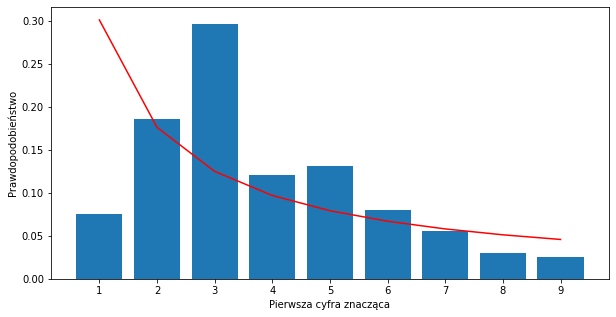

In [110]:
empirical_counts_1_wave, empirical_frequency_1_wave, total_count_1_wave, digit_1_wave = count_first_digit(df_1_wave['new_cases'])

first_digit_chart(empirical_frequency_1_wave, theoretical_1st_number)

In [111]:
df_2_wave = df[((df["date"]>= '2020-09-21') & ((df["date"]<= '2021-09-21')))]

In [112]:
df_2_wave.head(2)

,date,new_cases
201,2020-09-21,748
202,2020-09-22,711


In [113]:
df_2_wave.describe()

,new_cases
count,366.000000
mean,7704.284153
std,8524.757422
min,38.000000
25%,368.500000
50%,4884.000000
75%,12146.000000
max,35253.000000


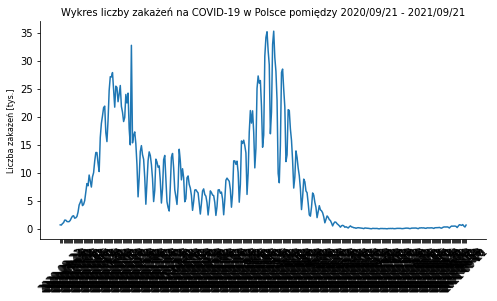

In [114]:
plt.figure(figsize=(8, 4))
plt.ylabel("Liczba zakażeń [tys.]", fontsize = 8)
plt.xticks(rotation = 45)
plt.title("Wykres liczby zakażeń na COVID-19 w Polsce pomiędzy 2020/09/21 - 2021/09/21", fontsize = 10)
plt.plot(df_2_wave.date, df_2_wave.new_cases/1000)
#plt.xlim([datetime.date(2020,3,4),datetime.date(2020, 10, 10)])
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False);

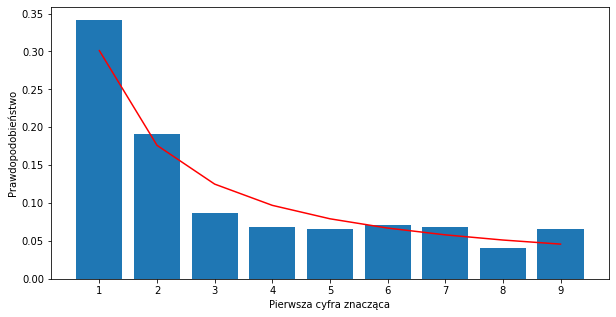

In [115]:
empirical_counts_2_wave, empirical_frequency_2_wave, total_count_2_wave, digit_2_wave = count_first_digit(df_2_wave['new_cases'])

first_digit_chart(empirical_frequency_2_wave, theoretical_1st_number)

In [ ]:
data = df_1_wave['new_cases']
# Get only non-zero values
data = data[data>=1]

# Get the first digits
first_digits = list(map(lambda x: int(str(x)[0]), data))


# Count occurences. Make sure every position is for [1-9]
empirical_counts = np.zeros(9)
digit = []
for i in range(1, 10):
    empirical_counts[i - 1] = first_digits.count(i)
    digit.append(i)

# Total amount
total_count = sum(empirical_counts)
# Make percentage
empirical_frequency = [(i / total_count) for i in empirical_counts]
# Return
#return(empirical_counts, empirical_frequency, total_count, digit)

In [ ]:
data

29     392
30     437
31     244
32     475
33     311
      ... 
134    333
135    353
136    339
137    358
138    279
Name: new_cases, Length: 110, dtype: int64

In [ ]:
df.head(10)

,date,new_cases
0,2020-03-04,1
1,2020-03-05,0
2,2020-03-06,4
3,2020-03-07,0
4,2020-03-08,6
5,2020-03-09,5
6,2020-03-10,6
7,2020-03-11,9
8,2020-03-12,18
9,2020-03-13,19


In [ ]:
df.tail()

,date,new_cases
730,2022-03-04,12489
731,2022-03-05,12725
732,2022-03-06,7698
733,2022-03-07,5583
734,2022-03-08,13176


In [ ]:
df_d=load_data('Poland_COVID_deaths.xlsx')
df_d=df_d.dropna()
df_d.dropna(inplace=True)
df_d.reset_index(drop=True, inplace=True)
df_d['deaths']=df_d['deaths'].astype(int)

In [ ]:
empirical_counts_deaths, empirical_frequency_deaths, total_count_deaths, digit_deaths = count_first_digit(df_d['deaths'])

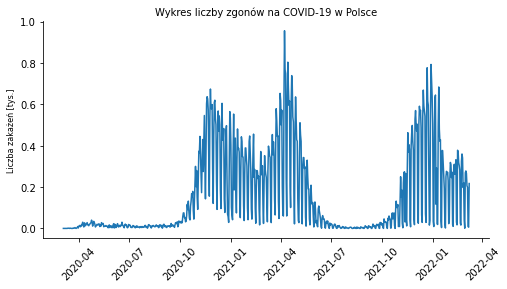

In [ ]:
plt.figure(figsize=(8, 4))
plt.ylabel("Liczba zakażeń [tys.]", fontsize = 8)
plt.xticks(rotation = 45)
plt.title("Wykres liczby zgonów na COVID-19 w Polsce", fontsize = 10)
plt.plot(df_d.date, df_d.deaths/1000)
#plt.xlim([datetime.date(2020,3,4),datetime.date(2020, 10, 10)])
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False);

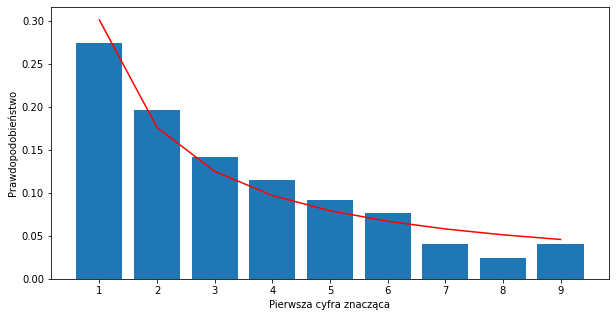

In [ ]:
first_digit_chart(empirical_frequency_deaths, theoretical_1st_number)

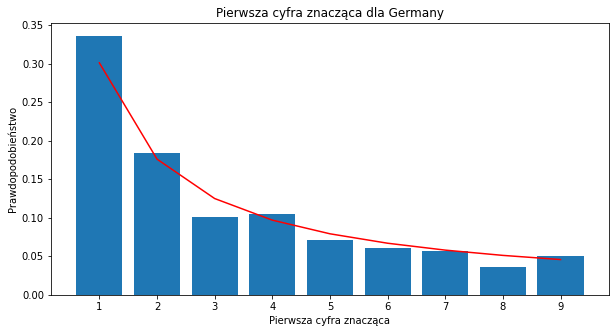

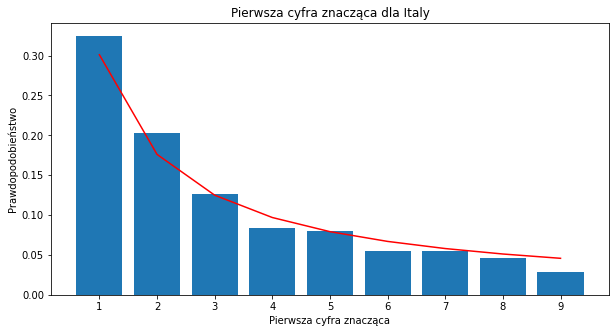

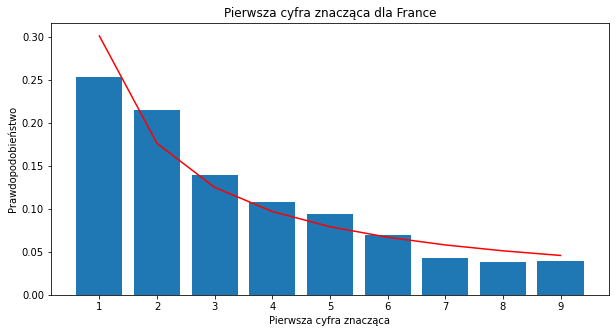

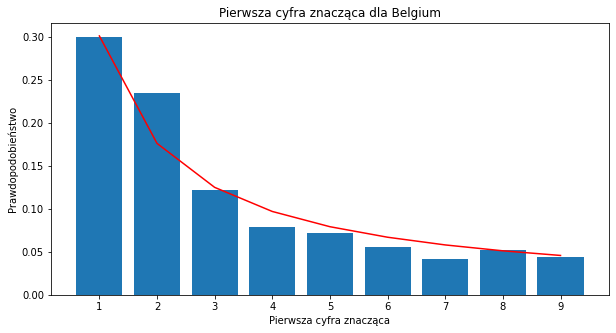

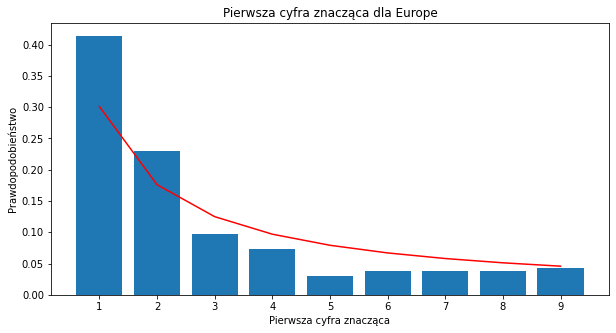

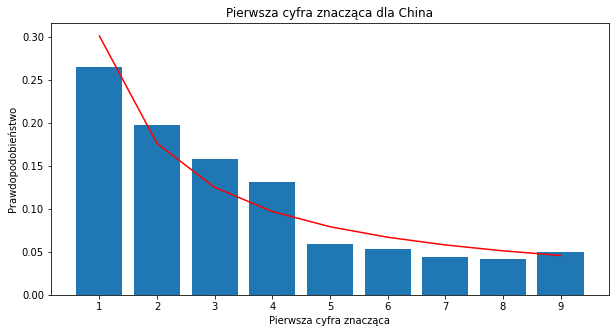

In [168]:
# fig, axes = plt.subplots(3, 4, figsize=(25, 15))

# fig.suptitle('First digit for countries')


# fig, axs = plt.subplots(2, 3)
# axs[0, 0].plot(x, y)
# axs[0, 0].set_title('Axis [0, 0]')
# axs[0, 1].plot(x, y, 'tab:orange')
# axs[0, 1].set_title('Axis [0, 1]')
# axs[1, 0].plot(x, -y, 'tab:green')
# axs[1, 0].set_title('Axis [1, 0]')
# axs[1, 1].plot(x, -y, 'tab:red')
# axs[1, 1].set_title('Axis [1, 1]')


k=0
j=0

for i in ["Germany", "Italy", "France", "Belgium", "Europe", "China"]:

  df = newCasesForCountry(dfAll, i)

  empirical_counts, empirical_frequency, total_count, digit = count_first_digit(df['new_cases'])
  empirical_counts2, empirical_frequency2, total_count2, digit2 = count_second_digit(df['new_cases'])
  empirical_two_first_counts, empirical_two_first_frequency2, total_two_first_count2, digit_two_first = count_two_first_digit(df['new_cases'])
  pl = first_digit_chart(empirical_frequency, theoretical_1st_number, "Pierwsza cyfra znacząca dla " + i) 
  #pl.show()
  k=(k+1)%3
  j=(j+1)%2

In [126]:
dfAll.China

0         NaN
1        92.0
2       277.0
3       483.0
4       663.0
        ...  
1071      0.0
1072      0.0
1073      0.0
1074      0.0
1075      0.0
Name: China, Length: 1076, dtype: float64